<a href="https://colab.research.google.com/github/abhishekmishrabareilly/Deep-Learning/blob/main/DL_Project_5_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:01<00:00, 137MB/s]
100% 163M/163M [00:01<00:00, 127MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2934.jpg', 'with_mask_3143.jpg', 'with_mask_2838.jpg', 'with_mask_1347.jpg', 'with_mask_2489.jpg']
['with_mask_1617.jpg', 'with_mask_19.jpg', 'with_mask_3279.jpg', 'with_mask_1137.jpg', 'with_mask_586.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3043.jpg', 'without_mask_932.jpg', 'without_mask_3295.jpg', 'without_mask_2491.jpg', 'without_mask_1208.jpg']
['without_mask_2887.jpg', 'without_mask_1190.jpg', 'without_mask_2629.jpg', 'without_mask_3267.jpg', 'without_mask_372.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

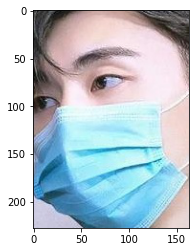

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

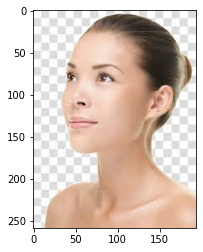

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

In [19]:
data[0]

array([[[159, 135, 104],
        [162, 137, 107],
        [166, 141, 109],
        ...,
        [ 31,  30,  36],
        [ 31,  31,  31],
        [ 30,  29,  36]],

       [[159, 135, 104],
        [162, 137, 107],
        [166, 141, 109],
        ...,
        [ 31,  30,  37],
        [ 31,  31,  33],
        [ 31,  30,  37]],

       [[159, 135, 104],
        [162, 137, 107],
        [166, 141, 109],
        ...,
        [ 31,  30,  37],
        [ 31,  31,  33],
        [ 31,  30,  37]],

       ...,

       [[110, 108,  84],
        [110, 108,  89],
        [ 97,  96,  84],
        ...,
        [ 22,  19,  26],
        [ 21,  18,  25],
        [ 20,  20,  22]],

       [[106, 103,  82],
        [106, 104,  88],
        [ 94,  91,  83],
        ...,
        [ 22,  19,  26],
        [ 21,  18,  25],
        [ 20,  20,  22]],

       [[106, 103,  83],
        [107, 103,  90],
        [ 94,  90,  84],
        ...,
        [ 22,  19,  26],
        [ 21,  18,  25],
        [ 20,  20,  22]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train[0]

array([[[ 42,  42,  42],
        [ 42,  42,  42],
        [ 40,  40,  40],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[ 41,  41,  41],
        [ 41,  41,  41],
        [ 38,  38,  38],
        ...,
        [ 39,  39,  39],
        [ 39,  39,  39],
        [ 39,  39,  39]],

       [[ 37,  37,  37],
        [ 37,  37,  37],
        [ 35,  35,  35],
        ...,
        [ 46,  46,  46],
        [ 46,  46,  46],
        [ 46,  46,  46]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [31]:
X_train_scaled[0]

array([[[0.16470588, 0.16470588, 0.16470588],
        [0.16470588, 0.16470588, 0.16470588],
        [0.15686275, 0.15686275, 0.15686275],
        ...,
        [0.14117647, 0.14117647, 0.14117647],
        [0.14117647, 0.14117647, 0.14117647],
        [0.14117647, 0.14117647, 0.14117647]],

       [[0.16078431, 0.16078431, 0.16078431],
        [0.16078431, 0.16078431, 0.16078431],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.15294118, 0.15294118, 0.15294118],
        [0.15294118, 0.15294118, 0.15294118],
        [0.15294118, 0.15294118, 0.15294118]],

       [[0.14509804, 0.14509804, 0.14509804],
        [0.14509804, 0.14509804, 0.14509804],
        [0.1372549 , 0.1372549 , 0.1372549 ],
        ...,
        [0.18039216, 0.18039216, 0.18039216],
        [0.18039216, 0.18039216, 0.18039216],
        [0.18039216, 0.18039216, 0.18039216]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 24ms/step - loss: 0.4506 - acc: 0.8050 - val_loss: 0.2683 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2951 - acc: 0.8863 - val_loss: 0.2207 - val_acc: 0.9091
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2396 - acc: 0.9058 - val_loss: 0.1645 - val_acc: 0.9421
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1993 - acc: 0.9266 - val_loss: 0.1712 - val_acc: 0.9256
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1758 - acc: 0.9342 - val_loss: 0.1968 - val_acc: 0.9190


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2331 - acc: 0.9140
Test Accuracy = 0.9139642715454102


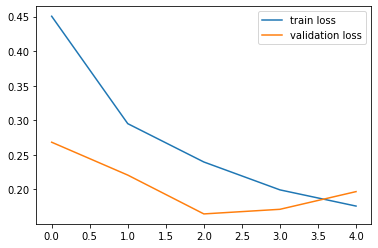

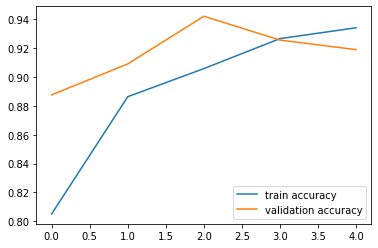

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/123.png


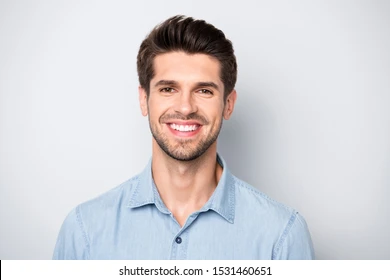

1/1 [==============================] - 0s 25ms/step
[[0.56143385 0.42043242]]
0
The person in the image is not wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/download.jpg


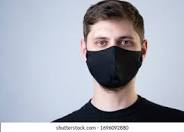

1/1 [==============================] - 0s 21ms/step
[[0.26195294 0.6923074 ]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')